In [1]:
import matplotlib.pyplot as plt
import MDAnalysis as mda
import pandas as pd
import numpy as np
import argparse

In [2]:
def get_rmsd(rmsd_file: str) -> tuple:
    """
    read in an xvg-formatted file and ouput lists of time, rmsd
    """
    reader = mda.auxiliary.XVG.XVGReader(rmsd_file)
    time = [step.data[0]/100  for step in reader]
    rmsd = [step.data[1] for step in reader]
    return time, rmsd


def get_bond_lengths(distance_file: str) -> tuple:
    """
    get bond lengths between zinc and its coordinating atoms
    """    
    reader = mda.auxiliary.XVG.XVGReader(distance_file)
    time = [step.data[0]/100 for step in reader]
    get_distance = lambda index: [step.data[index] for step in reader]
    distance_1 = get_distance(1)
    distance_2 = get_distance(2)
    distance_3 = get_distance(3)
    distance_4 = get_distance(4)
    return time, distance_1, distance_2, distance_3, distance_4


def get_running_average(time: list, quantity: list, window=100) -> np.array:
    """
    calculate the running average over a window of N ps
    """
    dataframe = pd.DataFrame({"time": time, "distance": quantity})
    return dataframe["distance"].rolling(window=window).mean().to_numpy()


def get_equilibration(file: str) -> tuple:
    """
    open xvg-formatted file and return tuple of time and equilibration quantity
    """
    reader = mda.auxiliary.XVG.XVGReader(file)
    time = [step.data[0] for step in reader]
    quantity = [step.data[1] for step in reader]
    return time, quantity


# Ligand 1 bonded vs non-bonded


In [3]:
path = "/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/amber/10_md/"
zn_1_file = path + "dis_zn1.dat"
zn_2_file = path + "dis_zn2.dat"

time1, hd1, he1, hd2, pt11 = get_bond_lengths(zn_1_file)
time2, ap1, cs1, hd3, pt12 = get_bond_lengths(zn_2_file)

hd1_avg = get_running_average(time1, hd1)
he1_avg = get_running_average(time1, he1)
hd2_avg = get_running_average(time1, hd2)
pt11_avg = get_running_average(time1, pt11)

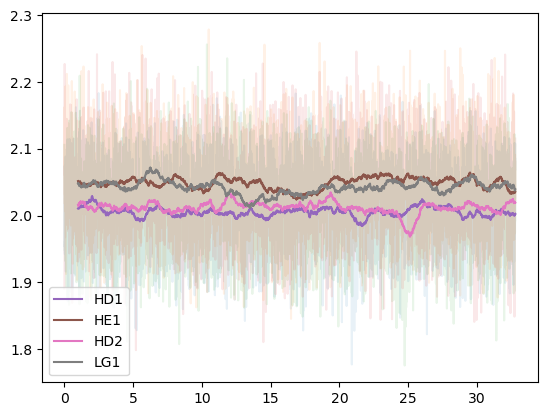

In [7]:
plt.plot(time1, hd1, alpha = 0.1)
plt.plot(time1, he1, alpha = 0.1)
plt.plot(time1, hd2, alpha = 0.1)
plt.plot(time1, pt11, alpha = 0.1)

plt.plot(time1, hd1_avg, label="HD1")
plt.plot(time1, he1_avg, label="HE1")
plt.plot(time1, hd2_avg, label="HD2")
plt.plot(time1, pt11_avg, label="LG1")
plt.legend()

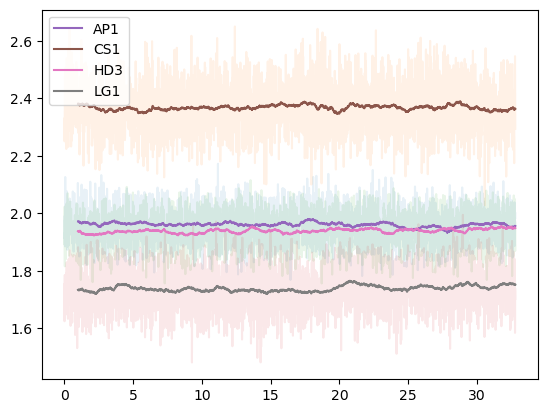

In [9]:
plt.plot(time1, ap1, alpha = 0.1)
plt.plot(time1, cs1, alpha = 0.1)
plt.plot(time1, hd3, alpha = 0.1)
plt.plot(time1, pt12, alpha = 0.1)
ap1_avg = get_running_average(time1, ap1)
cs1_avg = get_running_average(time1, cs1)
hd3_avg = get_running_average(time1, hd3)
pt12_avg = get_running_average(time1, pt12)

plt.plot(time2, ap1_avg, label="AP1")
plt.plot(time2, cs1_avg, label="CS1")
plt.plot(time2, hd3_avg, label="HD3")
plt.plot(time2, pt12_avg, label="LG1")
plt.legend()

In [8]:
bb_rmsd_file = f"/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/gromacs/analysis/protein_bb_ca_rmsd.dat"
metal_rmsd_file = f"/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/gromacs/analysis/metal_site_heavy_atoms_rmsd.dat"

bb_time, bb_rmsd = get_rmsd(bb_rmsd_file)
metal_time, metal_rmsd = get_rmsd(metal_rmsd_file)

zn1_distance_file = f"/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/gromacs/analysis/dis_zn1.dat"
zn1_time, zn1_hd1, zn1_he1, zn1_hd2, zn1_pt1 = get_bond_lengths(zn1_distance_file)
zn2_distance_file = f"/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/gromacs/analysis/dis_zn2.dat"
zn2_time, zn2_ap1, zn2_cs1, zn2_hd3, zn2_pt1 = get_bond_lengths(zn2_distance_file)

# parameters = {"ytick.color": "w",
#               "xtick.color": "w",
#               "axes.labelcolor": "w",
#               "axes.edgecolor": "w"}
# plt.rcParams.update(parameters)
# plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(bb_time, bb_rmsd, c="#0099AB", label="Backbone")
ax.plot(metal_time, metal_rmsd, c="lightgray", label="Metal ligands")
ax.set_xlabel("Time / ns", fontsize=14)
ax.set_ylabel("RMSD / Å", fontsize=14)
ax.legend(loc="lower right", fontsize=14)

# ax.spines["bottom"].set_color("#FFFFFF")
# ax.spines["top"].set_color("#FFFFFF")
# ax.spines["left"].set_color("#FFFFFF")
# ax.spines["right"].set_color("#FFFFFF")
ax.tick_params(axis="both", which="major", labelsize=14)

fig.set_facecolor("k")
fig.tight_layout()
plt.show()
fig.savefig(f"/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/gromacs/analysis/rmsd_comp.png", dpi=600)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(zn1_time, zn1_hd1, color="#0099AB", alpha=0.1)
ax.plot(zn1_time, zn1_he1, color="#61BF1A", alpha=0.1)
ax.plot(zn1_time, zn1_hd2, color="#830065", alpha=0.1)
ax.plot(zn1_time, zn1_pt1, color="#C6DBE9", alpha=0.1)

hd1_avg = get_running_average(zn1_time, zn1_hd1)
he1_avg = get_running_average(zn1_time, zn1_he1)
hd2_avg = get_running_average(zn1_time, zn1_hd2)
pt11_avg = get_running_average(zn1_time, zn1_pt1)

ax.plot(zn1_time, hd1_avg, color="#0099AB", label="ZN1 - HD1")
ax.plot(zn1_time, he1_avg, color="#61BF1A", label="ZN1 - HE1")
ax.plot(zn1_time, hd2_avg, color="#830065", label="ZN1 - HD2")
ax.plot(zn1_time, pt11_avg, color="#C6DBE9", label="ZN1 - PT1")

ax.set_xlabel("Time / ns", fontsize=14)
ax.set_ylabel("Bond length / Å", fontsize=14)
ax.legend(loc="lower right", fontsize=14)

ax.spines["bottom"].set_color("#FFFFFF")
ax.spines["top"].set_color("#FFFFFF")
ax.spines["left"].set_color("#FFFFFF")
ax.spines["right"].set_color("#FFFFFF")
ax.tick_params(axis="both", which="major", labelsize=14)

fig.set_facecolor("k")
fig.tight_layout()
plt.show()
fig.savefig(f"/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/gromacs/analysis/zn1_bonds.png", dpi=600)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(zn2_time, zn2_ap1, color="#0099AB", alpha=0.1)
ax.plot(zn2_time, zn2_cs1, color="#61BF1A", alpha=0.1)
ax.plot(zn2_time, zn2_hd3, color="#830065", alpha=0.1)
ax.plot(zn2_time, zn2_pt1, color="#C6DBE9", alpha=0.1)

ap1_avg = get_running_average(zn2_time, zn2_ap1)
cs1_avg = get_running_average(zn2_time, zn2_cs1)
hd3_avg = get_running_average(zn2_time, zn2_hd3)
pt12_avg = get_running_average(zn2_time, zn2_pt1)

ax.plot(zn2_time, ap1_avg, color="#0099AB", label="ZN2 - AP1")
ax.plot(zn2_time, cs1_avg, color="#61BF1A", label="ZN2 - CS1")
ax.plot(zn2_time, hd3_avg, color="#830065", label="ZN2 - HD3")
ax.plot(zn2_time, pt12_avg, color="#C6DBE9", label="ZN2 - PT1")

ax.set_xlabel("Time / ns", fontsize=14)
ax.set_ylabel("Bond length / Å", fontsize=14)
ax.legend(loc="lower right", fontsize=14)

ax.spines["bottom"].set_color("#FFFFFF")
ax.spines["top"].set_color("#FFFFFF")
ax.spines["left"].set_color("#FFFFFF")
ax.spines["right"].set_color("#FFFFFF")
ax.tick_params(axis="both", which="major", labelsize=14)

fig.set_facecolor("k")
fig.tight_layout()
plt.show()
fig.savefig(f"/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/gromacs/analysis/zn2_bonds.png", dpi=600)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/gromacs/analysis/protein_bb_ca_rmsd.dat'